In [2]:
import numpy as np
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Friends_episodes.csv to Friends_episodes.csv
User uploaded file "Friends_episodes.csv" with length 155655 bytes


In [4]:
episodes_df=pd.read_csv('Friends_episodes_df.csv')
guests_stars_df=pd.read_csv('friends_guest_stars.csv')

In [5]:
episodes_df.head()

,Unnamed: 0,id,job,original_name,popularity,air_date,episode_number,name,overview,runtime,season_number,vote_average,list_of_characters,average_character_popularity
0,0,85979,"['Director', 'Writer', 'Writer', 'Director of ...","['James Burrows', 'Jeff Greenstein', 'Jeff Str...","[5.803, 1.251, 0.84, 1.094, 1.62]",1994-11-17,9.0,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,23.0,1.0,8.043,"['Terry', 'Susan Bunch', 'Carol Willick', 'Gun...",14.485000
1,1,85981,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]",1994-10-06,3.0,The One with the Thumb,Monica finds it difficult to break up with her...,23.0,1.0,8.130,"['Lizzy', 'Paula', 'Alan', 'Gunther']",9.014250
2,2,85983,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...",1994-10-13,4.0,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,23.0,1.0,7.840,"['Nurse Sizemore', 'Joanne', 'Leslie', 'Pizza ...",6.773571
3,3,85987,"['Writer', 'Writer', 'Director', 'Executive Pr...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742...",1994-09-22,1.0,Pilot,An introduction to the gang. After Rachel leav...,23.0,1.0,7.081,"['Paul', 'Franny', 'Jasmine']",7.465333
4,4,85990,"['Writer', 'Writer', 'Director', 'Director of ...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.094, 1.62]",1994-11-10,8.0,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,23.0,1.0,7.837,"['Aunt Lillian', 'Lowell', 'Shelley', 'Jack Ge...",9.672667


In [14]:
episodes_df=episodes_df.drop(columns=['list_of_characters','average_character_popularity'])

In [10]:
guests_stars_df.head()

,episode_id,character,credit_id,order,adult,gender,id,name,original_name,popularity,profile_path
0,2639442,Himself - Host,5fff6e2b7d5db5003ec995ee,974,False,2.0,81200.0,Conan O'Brien,Conan O'Brien,14.017,/zlALLZ3c9BciE85XaKq9RrrEp1E.jpg
1,85987,Paul,52570fd219c295731c020957,510,False,2.0,80246.0,John Allen Nelson,John Allen Nelson,10.864,/ku0miuv59CJSB9iAhQJAMOcudau.jpg
2,85987,Franny,52570fd219c295731c02098d,608,False,1.0,1215072.0,Clea Lewis,Clea Lewis,6.415,/pknJ5IqM1tkSWf9kN6lQENpvE0i.jpg
3,85987,Jasmine,5b967e18c3a368568503ac3c,966,False,1.0,1397357.0,Cynthia Mann,Cynthia Mann,5.117,/ujhMgjurAyJQHBeQIwZZiT2U3tE.jpg
4,86012,Carol Willick,52570fd619c295731c020c73,511,False,1.0,49880.0,Anita Barone,Anita Barone,6.936,/iVwAzaBCx3VykhJnSZIjpCD7Bxl.jpg


In [12]:
guests_stars_df=guests_stars_df.drop(columns=['adult','gender','id','name','profile_path','credit_id','order','original_name'])
guests_stars_df.rename(columns={'episode_id': 'id'}, inplace=True)
guests_stars_df

,id,character,popularity
0,2639442,Himself - Host,14.017
1,85987,Paul,10.864
2,85987,Franny,6.415
3,85987,Jasmine,5.117
4,86012,Carol Willick,6.936
...,...,...,...
1024,87628,Janice,19.494
1025,87633,Erica,29.614
1026,87632,Mike Hanningan,42.535
1027,87632,Erica,29.614


In [13]:
characters_df = guests_stars_df.groupby('id').agg(
    list_of_characters=('character', list),
    list_of_popularity=('popularity', list)
).reset_index()
characters_df

,id,list_of_characters,list_of_popularity
0,85979,"[Terry, Susan Bunch, Carol Willick, Gunther]","[10.213, 24.725, 14.38, 8.622]"
1,85981,"[Lizzy, Paula, Alan, Gunther]","[15.354, 8.906, 3.175, 8.622]"
2,85983,"[Nurse Sizemore, Joanne, Leslie, Pizza Guy, Br...","[8.008, 12.244, 2.11, 12.757, 0.6, 3.074, 8.622]"
3,85987,"[Paul, Franny, Jasmine]","[10.864, 6.415, 5.117]"
4,85990,"[Aunt Lillian, Lowell, Shelley, Jack Geller, J...","[5.247, 3.111, 2.242, 21.466, 13.696, 12.274]"
...,...,...,...
219,1007807,"[Ginger, Leslie, Mark Robinson, Gunther]","[32.448, 16.473, 7.515, 8.622]"
220,1007808,"[The Singing Man, Emily Waltham, Gunther]","[0.6, 14.562, 8.622]"
221,1007810,"[Judge, Porsche Owner, Gunther]","[16.848, 1.96, 8.622]"
222,2639442,[Himself - Host],[14.017]


In [15]:
episodes_df = pd.merge(episodes_df, characters_df , on='id', how='inner')
episodes_df

,Unnamed: 0,id,job,original_name,popularity,air_date,episode_number,name,overview,runtime,season_number,vote_average,list_of_characters,list_of_popularity
0,0,85979,"['Director', 'Writer', 'Writer', 'Director of ...","['James Burrows', 'Jeff Greenstein', 'Jeff Str...","[5.803, 1.251, 0.84, 1.094, 1.62]",1994-11-17,9.0,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,23.0,1.0,8.043,"[Terry, Susan Bunch, Carol Willick, Gunther]","[10.213, 24.725, 14.38, 8.622]"
1,1,85981,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]",1994-10-06,3.0,The One with the Thumb,Monica finds it difficult to break up with her...,23.0,1.0,8.130,"[Lizzy, Paula, Alan, Gunther]","[15.354, 8.906, 3.175, 8.622]"
2,2,85983,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...",1994-10-13,4.0,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,23.0,1.0,7.840,"[Nurse Sizemore, Joanne, Leslie, Pizza Guy, Br...","[8.008, 12.244, 2.11, 12.757, 0.6, 3.074, 8.622]"
3,3,85987,"['Writer', 'Writer', 'Director', 'Executive Pr...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742...",1994-09-22,1.0,Pilot,An introduction to the gang. After Rachel leav...,23.0,1.0,7.081,"[Paul, Franny, Jasmine]","[10.864, 6.415, 5.117]"
4,4,85990,"['Writer', 'Writer', 'Director', 'Director of ...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.094, 1.62]",1994-11-10,8.0,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,23.0,1.0,7.837,"[Aunt Lillian, Lowell, Shelley, Jack Geller, J...","[5.247, 3.111, 2.242, 21.466, 13.696, 12.274]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,224,87442,NaN,NaN,NaN,2003-02-13,15.0,The One with the Mugging,Joey endures a draining audition at the hands ...,23.0,9.0,8.600,"[Lowell, Steve, Leonard Hayes, Female Producer...","[5.053, 11.2, 23.079, 2.227, 8.622]"
219,225,87477,NaN,NaN,NaN,2003-02-20,16.0,The One with the Boob Job,When Monica and Chandler are financially strap...,24.0,9.0,8.500,"[Mike Hanningan, Gunther]","[42.535, 8.622]"
220,226,87517,NaN,NaN,NaN,2003-04-17,19.0,The One with Rachel's Dream,Rachel dreams about a romantic encounter with ...,25.0,9.0,8.500,"[Olivia, Director, Gunther]","[14.435, 1.959, 8.622]"
221,227,87553,NaN,NaN,NaN,2003-10-02,2.0,The One Where Ross Is Fine,"Rachel, Joey and Charlie attend an uncomfortab...",24.0,10.0,8.600,"[Leslie Buffay, Charlie Wheeler, Frank Buffay ...","[5.081, 13.504, 1.388, 12.603, 41.336, 3.012, ..."


In [20]:
episodes_df.shape

(223, 14)

In [6]:
def analyze_missing_values(df):
    # Check for missing values in the dataframe
    missing_values = df.isnull().sum()
    # Calculate the percentage of missing values
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    # Create a dataframe from the missing_values and missing_percentage
    missing_data = pd.DataFrame({'Total Missing Values': missing_values, '% of Missing Values': missing_percentage})
    # Sort the dataframe based on the highest percentage of missing values
    missing_data_sorted = missing_data[missing_data.iloc[:, 1] != 0].sort_values(by='% of Missing Values', ascending=False).round(1)
    # Return the resulting dataframe
    return missing_data_sorted

In [7]:
missing_data_analysis_ep = analyze_missing_values(episodes_df)
print(missing_data_analysis_ep)

Empty DataFrame
Columns: [Total Missing Values, % of Missing Values]
Index: []


In [9]:
episodes_df.head()

,Unnamed: 0,id,job,original_name,popularity,air_date,episode_number,Title,overview,runtime,season_number,vote_average,list_of_characters,list_of_popularity,title_len
0,0,85979,"['Director', 'Writer', 'Writer', 'Director of ...","['James Burrows', 'Jeff Greenstein', 'Jeff Str...","[5.803, 1.251, 0.84, 1.094, 1.62]",1994-11-17,9.0,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,23.0,1.0,8.043,"['Terry', 'Susan Bunch', 'Carol Willick', 'Gun...","[10.213, 24.725, 14.38, 8.622]",32
1,1,85981,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]",1994-10-06,3.0,The One with the Thumb,Monica finds it difficult to break up with her...,23.0,1.0,8.130,"['Lizzy', 'Paula', 'Alan', 'Gunther']","[15.354, 8.906, 3.175, 8.622]",22
2,2,85983,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...",1994-10-13,4.0,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,23.0,1.0,7.840,"['Nurse Sizemore', 'Joanne', 'Leslie', 'Pizza ...","[8.008, 12.244, 2.11, 12.757, 0.6, 3.074, 8.622]",34
3,3,85987,"['Writer', 'Writer', 'Director', 'Executive Pr...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742...",1994-09-22,1.0,Pilot,An introduction to the gang. After Rachel leav...,23.0,1.0,7.081,"['Paul', 'Franny', 'Jasmine']","[10.864, 6.415, 5.117]",5
4,4,85990,"['Writer', 'Writer', 'Director', 'Director of ...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.094, 1.62]",1994-11-10,8.0,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,23.0,1.0,7.837,"['Aunt Lillian', 'Lowell', 'Shelley', 'Jack Ge...","[5.247, 3.111, 2.242, 21.466, 13.696, 12.274]",29


In [8]:
episodes_df.rename(columns={'name': 'Title'}, inplace=True)
episodes_df['title_len'] = episodes_df['Title'].apply(lambda x: len(x))

In [10]:
import calendar
from datetime import datetime, timedelta

In [11]:
# Function to check if a date falls within a holiday week
def is_holiday_week(air_date):
    try:
        # Parse the air date
        air_date = datetime.strptime(air_date, '%Y-%m-%d')
        year = air_date.year

        # New Year's Week (Dec 31st to Jan 6th)
        new_years_week_start = datetime(year - 1, 12, 31)
        new_years_week_end = datetime(year, 1, 6)

        # Memorial Day Week (last Monday of May)
        may_calendar = calendar.monthcalendar(year, 5)
        memorial_day = next(day for week in may_calendar[::-1] for day in week if day != 0)
        memorial_day_date = datetime(year, 5, memorial_day)
        memorial_day_week_start = memorial_day_date - timedelta(days=memorial_day_date.weekday())
        memorial_day_week_end = memorial_day_week_start + timedelta(days=6)

        # Independence Day Week (June 28th to July 4th)
        independence_day_week_start = datetime(year, 6, 28)
        independence_day_week_end = datetime(year, 7, 4)

        # Labor Day Week (first Monday of September)
        september_calendar = calendar.monthcalendar(year, 9)
        labor_day = next(day for week in september_calendar for day in week if day != 0)
        labor_day_date = datetime(year, 9, labor_day)
        labor_day_week_start = labor_day_date - timedelta(days=labor_day_date.weekday())
        labor_day_week_end = labor_day_week_start + timedelta(days=6)

        # Thanksgiving Week (fourth Thursday of November)
        november_calendar = calendar.monthcalendar(year, 11)
        thanksgiving = next(week[3] for week in november_calendar if week[3] != 0)
        thanksgiving_date = datetime(year, 11, thanksgiving)
        thanksgiving_week_start = thanksgiving_date - timedelta(days=3)
        thanksgiving_week_end = thanksgiving_week_start + timedelta(days=6)

        # Christmas Week (Dec 24th to Dec 30th)
        christmas_week_start = datetime(year, 12, 24)
        christmas_week_end = datetime(year, 12, 30)

        # Check if the air_date falls within any holiday week
        if ((new_years_week_start <= air_date <= new_years_week_end) or
            (memorial_day_week_start <= air_date <= memorial_day_week_end) or
            (independence_day_week_start <= air_date <= independence_day_week_end) or
            (labor_day_week_start <= air_date <= labor_day_week_end) or
            (thanksgiving_week_start <= air_date <= thanksgiving_week_end) or
            (christmas_week_start <= air_date <= christmas_week_end)):
            return True
        else:
            return False
    except ValueError:
        # In case the air_date is not a valid date format
        return False

Holiday_Episode

In [12]:
episodes_df['holiday_episode'] = episodes_df['air_date'].apply(is_holiday_week).astype(int)

# Let's take a look at the result
episodes_df[['air_date', 'holiday_episode']].head()


,air_date,holiday_episode
0,1994-11-17,0
1,1994-10-06,0
2,1994-10-13,0
3,1994-09-22,0
4,1994-11-10,0


In [13]:
episodes_df[episodes_df['holiday_episode']==1]

,Unnamed: 0,id,job,original_name,popularity,air_date,episode_number,Title,overview,runtime,season_number,vote_average,list_of_characters,list_of_popularity,title_len,holiday_episode
7,7,86027,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 1.691, 2.917]",1994-11-03,7.0,The One with the Blackout,A power outage leaves Chandler stranded in an ...,23.0,1.0,8.469,"['Jill Goodacre', 'Mr. Heckles', 'Paolo']","[3.887, 11.908, 5.583]",25,1
12,12,86066,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62]",1995-01-05,11.0,The One with Mrs. Bing,Chandler's romance-novelist mother comes to Ne...,23.0,1.0,7.978,"['Nora Bing', 'Jay Leno', 'Paolo', 'Coma Guy',...","[47.058, 7.795, 5.583, 1.619, 8.622]",22,1
30,30,86121,"['Director', 'Editor', 'Director of Photograph...","['Gail Mancuso', 'David Helfand', 'Mikel Neier...","[2.681, 0.98, 1.632, 0.694]",1995-11-02,6.0,The One with the Baby on the Bus,"Chandler and Joey lose Ross's son, Ben and whi...",23.0,2.0,8.333,"['Caroline Duffy', 'Terry', 'Stephanie Schiffe...","[20.862, 10.213, 6.531, 34.717, 3.092, 2.249, ...",32,1
32,32,86131,"['Director', 'Editor', 'Writer', 'Director of ...","['Thomas Schlamme', 'David Helfand', 'Ira Unge...","[1.972, 0.98, 2.744, 1.632]",1996-01-04,10.0,The One with Russ,Monica gets back together with Fun Bobby. Joey...,23.0,2.0,8.000,"['Fun Bobby', 'Estelle Leonard', 'Julie']","[5.29, 6.511, 24.636]",17,1
51,51,86292,"['Director', 'Writer', 'Editor', 'Editor', 'Di...","['Gail Mancuso', 'Seth Kurland', 'Stephen Prim...","[2.681, 1.261, 0.6, 0.98, 1.632]",1996-11-07,7.0,The One with the Race Car Bed,Monica buys a new bed from Janice's soon-to-be...,23.0,3.0,8.237,"['Cal', 'Leonard Green', 'Mattress King', 'Del...","[13.129, 3.887, 4.357, 5.761, 2.423, 0.728, 0....",29,1
71,71,86403,"['Director', 'Writer', 'Writer']","['Shelley Jensen', 'Scott Silveri', 'Shana Gol...","[3.842, 3.0, 1.788]",1997-11-06,6.0,The One with the Dirty Girl,Ross's new girlfriend seems nearly perfect unt...,23.0,4.0,8.457,"['Mrs. Burkart', 'Cheryl', 'Kathy', 'Gunther']","[2.18, 24.111, 33.327, 8.622]",27,1
91,91,86542,"['Director', 'Writer', 'Editor', 'Director of ...","['Gary Halvorson', 'Alexa Junge', 'Stephen Pri...","[2.843, 1.388, 0.6, 1.632, 0.924, 0.6, 2.436, ...",1998-11-05,6.0,The One with the Yeti,Emily decides that the only way to continue he...,23.0,5.0,8.000,"['Emily Waltham', 'Danny', 'Gunther']","[14.562, 8.415, 8.622]",21,1
119,120,86845,"['Writer', 'Director']","['Brian Boyle', 'Kevin S. Bright']","[1.46, 1.519]",2000-01-06,11.0,The One with the Apothecary Table,Rachel orders an apothecary table from Pottery...,22.0,6.0,8.184,"['Janine Lecroix', 'Gunther']","[10.05, 8.622]",33,1
133,136,87017,"['Writer', 'Editor', 'Director of Photography'...","['Patty Lin', 'Stephen Prime', 'Nick McLean', ...","[2.958, 0.6, 6.14, 0.677]",2000-11-02,5.0,The One with the Engagement Picture,While taking an engagement picture for himself...,22.0,7.0,8.000,"['Whitney', 'Tag', 'Kyle', 'Melissa', 'Gunther']","[22.946, 12.141, 15.539, 6.571, 8.622]",35,1
137,140,87027,['Writer'],['Shana Goldberg-Meehan'],[1.788],2001-01-04,11.0,The One with All the Cheesecakes,Phoebe gets upset with Joey when he blows off ...,22.0,7.0,8.400,"['Wedding Guest', 'The Man', 'David', 'Waiter'...","[2.758, 1.575, 34.073, 1.388, 8.622]",32,1


No. of episodes in each season

In [15]:
total_episodes_by_season = episodes_df.groupby('season_number').size()
total_episodes_by_season

season_number
1.0     24
2.0     24
3.0     25
4.0     23
5.0     23
6.0     21
7.0     21
8.0     23
9.0     23
10.0    16
dtype: int64

In [30]:
episodes_df['air_date'] = pd.to_datetime(episodes_df['air_date'], errors='coerce')

In [17]:
# get minimum and maximum (start date end date) for the corpus of episodes.
print(episodes_df['air_date'].min())
print(episodes_df['air_date'].max())

1994-09-22
2004-05-06


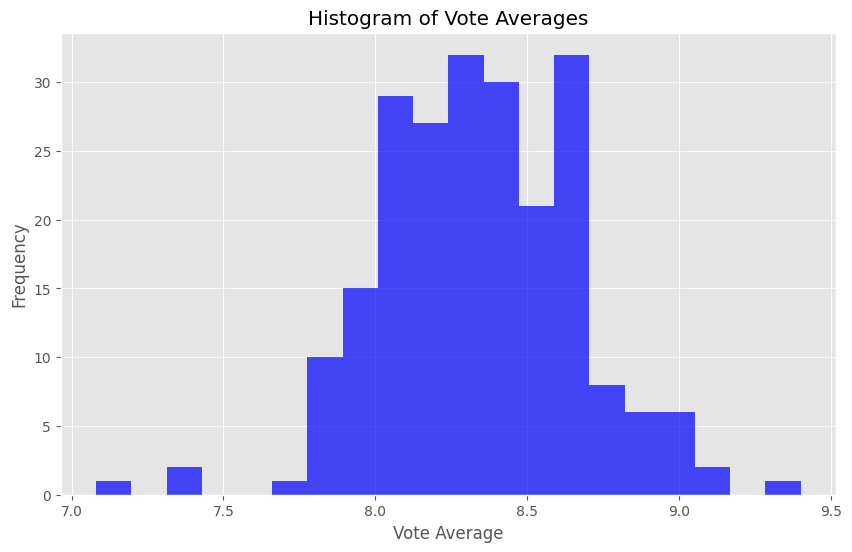

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(episodes_df['vote_average'], bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

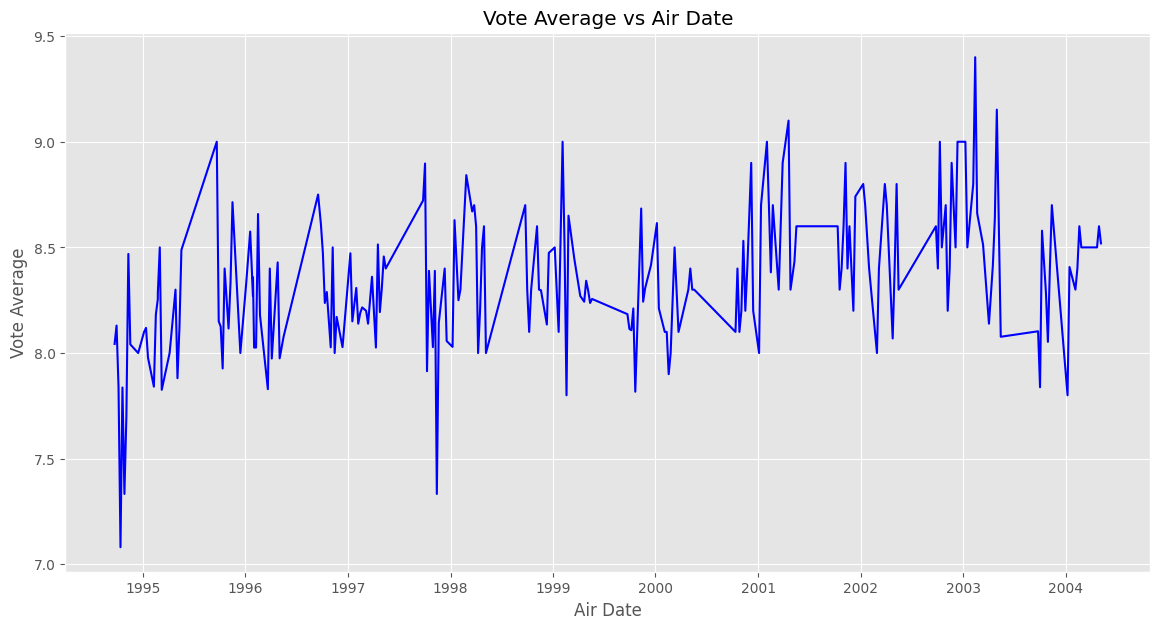

In [33]:
# Plotting a line graph for vote_average vs air_date
plt.figure(figsize=(14, 7))
plt.plot(episodes_df['air_date'].sort_values(), episodes_df['vote_average'], marker='', linestyle='-', color='blue')
plt.title('Vote Average vs Air Date')
plt.xlabel('Air Date')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

In [34]:
pip install textblob


In [35]:
import pandas as pd
from textblob import TextBlob

# Define a function to calculate sentiment using TextBlob
def calculate_sentiment(text):
    if pd.isna(text):  # Check for NaN values and return None
        return None
    # Create a TextBlob object and get the polarity
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

# Apply the function to calculate sentiment on the 'overview' column
episodes_df['sentiment'] = episodes_df['overview'].apply(calculate_sentiment)
episodes_df

,Unnamed: 0,id,job,original_name,popularity,air_date,episode_number,Title,overview,runtime,season_number,vote_average,list_of_characters,list_of_popularity,title_len,holiday_episode,sentiment
0,0,85979,"['Director', 'Writer', 'Writer', 'Director of ...","['James Burrows', 'Jeff Greenstein', 'Jeff Str...","[5.803, 1.251, 0.84, 1.094, 1.62]",1994-11-17,9.0,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,23.0,1.0,8.043,"['Terry', 'Susan Bunch', 'Carol Willick', 'Gun...","[10.213, 24.725, 14.38, 8.622]",32,0,-0.166667
1,1,85981,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]",1994-10-06,3.0,The One with the Thumb,Monica finds it difficult to break up with her...,23.0,1.0,8.130,"['Lizzy', 'Paula', 'Alan', 'Gunther']","[15.354, 8.906, 3.175, 8.622]",22,0,0.228571
2,2,85983,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...",1994-10-13,4.0,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,23.0,1.0,7.840,"['Nurse Sizemore', 'Joanne', 'Leslie', 'Pizza ...","[8.008, 12.244, 2.11, 12.757, 0.6, 3.074, 8.622]",34,0,-0.133333
3,3,85987,"['Writer', 'Writer', 'Director', 'Executive Pr...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742...",1994-09-22,1.0,Pilot,An introduction to the gang. After Rachel leav...,23.0,1.0,7.081,"['Paul', 'Franny', 'Jasmine']","[10.864, 6.415, 5.117]",5,0,0.300000
4,4,85990,"['Writer', 'Writer', 'Director', 'Director of ...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.094, 1.62]",1994-11-10,8.0,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,23.0,1.0,7.837,"['Aunt Lillian', 'Lowell', 'Shelley', 'Jack Ge...","[5.247, 3.111, 2.242, 21.466, 13.696, 12.274]",29,0,0.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,224,87442,"['Director', 'Writer']","['Gary Halvorson', ‘Peter Tibbals’]","[2.843, 1.388]",2003-02-13,15.0,The One with the Mugging,Joey endures a draining audition at the hands ...,23.0,9.0,8.600,"['Lowell', 'Steve', 'Leonard Hayes', 'Female P...","[5.053, 11.2, 23.079, 2.227, 8.622]",24,0,0.300000
219,225,87477,"['Director', 'Writer']","['Gary Halvorson', ‘Mark Kunerth’]","[2.843, 1.388]",2003-02-20,16.0,The One with the Boob Job,When Monica and Chandler are financially strap...,24.0,9.0,8.500,"['Mike Hanningan', 'Gunther']","[42.535, 8.622]",25,0,-0.137143
220,226,87517,"['Director', 'Writer']","[‘Terry Hughes’,’Dana Klein Borkow’]","[3.189, 2.384]",2003-04-17,19.0,The One with Rachel's Dream,Rachel dreams about a romantic encounter with ...,25.0,9.0,8.500,"['Olivia', 'Director', 'Gunther']","[14.435, 1.959, 8.622]",27,0,-0.500000
221,227,87553,"['Director', 'Writer']","[‘Ben Weiss’, ‘Sherry Bilsing​’]","[3.243, 1.643]",2003-10-02,2.0,The One Where Ross Is Fine,"Rachel, Joey and Charlie attend an uncomfortab...",24.0,10.0,8.600,"['Leslie Buffay', 'Charlie Wheeler', 'Frank Bu...","[5.081, 13.504, 1.388, 12.603, 41.336, 3.012, ...",26,0,-0.150000


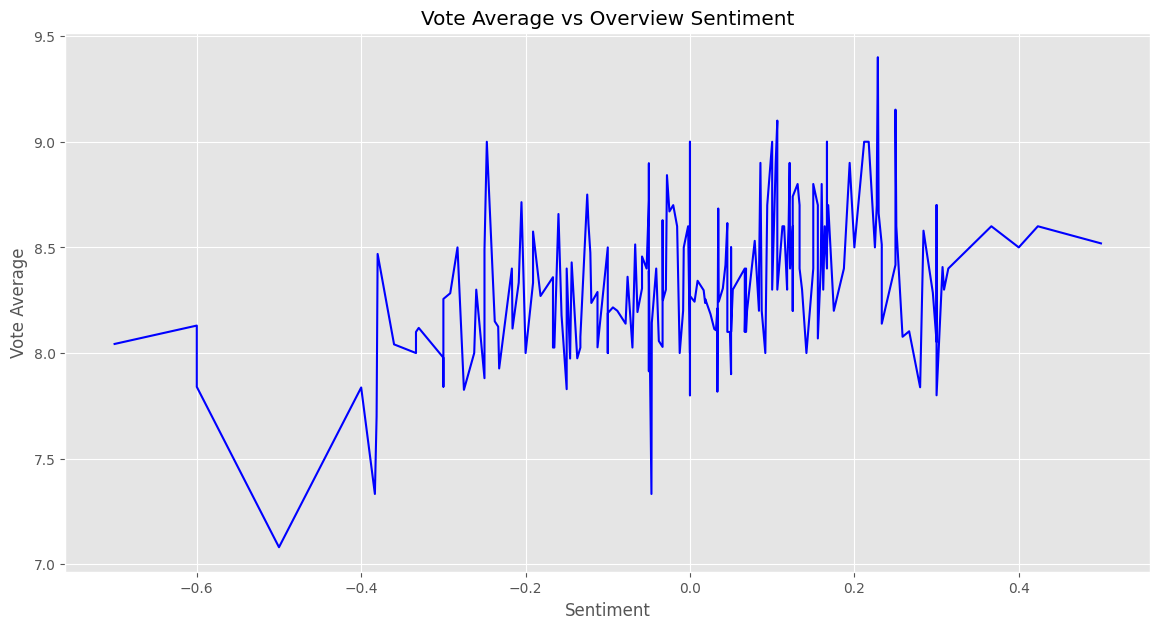

In [36]:
# Plotting a line graph for vote_average vs air_date
plt.figure(figsize=(14, 7))
plt.plot(episodes_df['sentiment'].sort_values(), episodes_df['vote_average'], marker='', linestyle='-', color='blue')
plt.title('Vote Average vs Overview Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

In [40]:
episodes_df.drop(columns=['sentiment_vader'])

,Unnamed: 0,id,job,original_name,popularity,air_date,episode_number,Title,overview,runtime,season_number,vote_average,list_of_characters,list_of_popularity,title_len,holiday_episode,sentiment
0,0,85979,"['Director', 'Writer', 'Writer', 'Director of ...","['James Burrows', 'Jeff Greenstein', 'Jeff Str...","[5.803, 1.251, 0.84, 1.094, 1.62]",1994-11-17,9.0,The One Where Underdog Gets Away,Monica's first Thanksgiving dinner for the gan...,23.0,1.0,8.043,"['Terry', 'Susan Bunch', 'Carol Willick', 'Gun...","[10.213, 24.725, 14.38, 8.622]",32,0,-0.166667
1,1,85981,"['Director', 'Director of Photography', 'Edito...","['James Burrows', 'Richard Hissong', 'Andy Zal...","[5.803, 1.094, 1.62, 4.742, 1.548, 3.805, 1.021]",1994-10-06,3.0,The One with the Thumb,Monica finds it difficult to break up with her...,23.0,1.0,8.130,"['Lizzy', 'Paula', 'Alan', 'Gunther']","[15.354, 8.906, 3.175, 8.622]",22,0,0.228571
2,2,85983,"['Director', 'Writer', 'Director of Photograph...","['James Burrows', 'Alexa Junge', 'Richard Hiss...","[5.803, 1.388, 1.094, 1.62, 4.742, 1.548, 3.80...",1994-10-13,4.0,The One with George Stephanopoulos,While the men attend a hockey game and end up ...,23.0,1.0,7.840,"['Nurse Sizemore', 'Joanne', 'Leslie', 'Pizza ...","[8.008, 12.244, 2.11, 12.757, 0.6, 3.074, 8.622]",34,0,-0.133333
3,3,85987,"['Writer', 'Writer', 'Director', 'Executive Pr...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.368, 1.62, 1.686, 4.742...",1994-09-22,1.0,Pilot,An introduction to the gang. After Rachel leav...,23.0,1.0,7.081,"['Paul', 'Franny', 'Jasmine']","[10.864, 6.415, 5.117]",5,0,0.300000
4,4,85990,"['Writer', 'Writer', 'Director', 'Director of ...","['Marta Kauffman', 'David Crane', 'James Burro...","[5.777, 3.76, 5.803, 1.094, 1.62]",1994-11-10,8.0,The One Where Nana Dies Twice,Monica and Ross mourn the death of their grand...,23.0,1.0,7.837,"['Aunt Lillian', 'Lowell', 'Shelley', 'Jack Ge...","[5.247, 3.111, 2.242, 21.466, 13.696, 12.274]",29,0,0.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,224,87442,"['Director', 'Writer']","['Gary Halvorson', ‘Peter Tibbals’]","[2.843, 1.388]",2003-02-13,15.0,The One with the Mugging,Joey endures a draining audition at the hands ...,23.0,9.0,8.600,"['Lowell', 'Steve', 'Leonard Hayes', 'Female P...","[5.053, 11.2, 23.079, 2.227, 8.622]",24,0,0.300000
219,225,87477,"['Director', 'Writer']","['Gary Halvorson', ‘Mark Kunerth’]","[2.843, 1.388]",2003-02-20,16.0,The One with the Boob Job,When Monica and Chandler are financially strap...,24.0,9.0,8.500,"['Mike Hanningan', 'Gunther']","[42.535, 8.622]",25,0,-0.137143
220,226,87517,"['Director', 'Writer']","[‘Terry Hughes’,’Dana Klein Borkow’]","[3.189, 2.384]",2003-04-17,19.0,The One with Rachel's Dream,Rachel dreams about a romantic encounter with ...,25.0,9.0,8.500,"['Olivia', 'Director', 'Gunther']","[14.435, 1.959, 8.622]",27,0,-0.500000
221,227,87553,"['Director', 'Writer']","[‘Ben Weiss’, ‘Sherry Bilsing​’]","[3.243, 1.643]",2003-10-02,2.0,The One Where Ross Is Fine,"Rachel, Joey and Charlie attend an uncomfortab...",24.0,10.0,8.600,"['Leslie Buffay', 'Charlie Wheeler', 'Frank Bu...","[5.081, 13.504, 1.388, 12.603, 41.336, 3.012, ...",26,0,-0.150000


In [42]:
episodes_df=episodes_df.drop(columns=['sentiment_vader'])

In [43]:
episodes_df.to_csv('Friends_episodes_data.csv')
files.download('Friends_episodes_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>